In [150]:
import pandas  as pd

train_df = pd.read_csv(r"./train.csv")



# Data Description

In [43]:
train_df.describe()


age  no_of_children  net_yearly_income  no_of_days_employed  \
count  45528.000000    44754.000000       4.552800e+04         45065.000000   
mean      38.993411        0.420655       2.006556e+05         67609.289293   
std        9.543990        0.724097       6.690740e+05        139323.524434   
min       23.000000        0.000000       2.717061e+04             2.000000   
25%       31.000000        0.000000       1.263458e+05           936.000000   
50%       39.000000        0.000000       1.717149e+05          2224.000000   
75%       47.000000        1.000000       2.406038e+05          5817.000000   
max       55.000000        9.000000       1.407590e+08        365252.000000   

       total_family_members  migrant_worker  yearly_debt_payments  \
count          45445.000000    45441.000000          45433.000000   
mean               2.158081        0.179111          31796.965311   
std                0.911572        0.383450          17269.727234   
min                1.000000        0.000000           2237.470000   
25%                2.000000        0.000000          19231.140000   
50%                2.000000        0.000000          29081.650000   
75%                3.000000        0.000000          40561.150000   
max               10.000000        1.000000         328112.860000   

       credit_limit  credit_limit_used(%)  credit_score  prev_defaults  \
count  4.552800e+04           45528.00000  45520.000000   45528.000000   
mean   4.354842e+04              52.23502    782.791257       0.060710   
std    1.487847e+05              29.37691    100.619746       0.264629   
min    4.003140e+03               0.00000    500.000000       0.000000   
25%    2.397381e+04              27.00000    704.000000       0.000000   
50%    3.568804e+04              54.00000    786.000000       0.000000   
75%    5.343576e+04              78.00000    867.000000       0.000000   
max    3.112997e+07              99.00000    949.000000       2.000000   

       default_in_last_6months  credit_card_default  
count             45528.000000         45528.000000  
mean                  0.050540             0.081203  
std                   0.219059             0.273149  
min                   0.000000             0.000000  
25%                   0.000000             0.000000  
50%                   0.000000             0.000000  
75%                   0.000000             0.000000  
max                   1.000000             1.000000

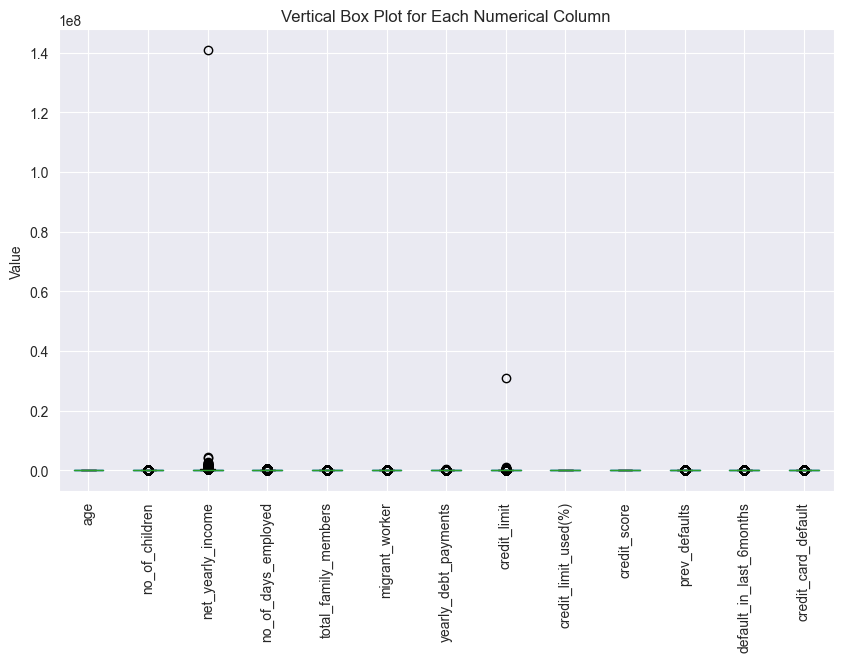

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
train_df.boxplot(vert=True, figsize=(10, 6))
plt.title('Vertical Box Plot for Each Numerical Column')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

In [151]:
print("Number of missing values in each column:")
print(train_df.isnull().sum())

data_cleaned = train_df.dropna()
data_cleaned = data_cleaned.drop(columns=['customer_id','name'])

Number of missing values in each column:
customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64


In [153]:
import numpy as np


numeric_columns = data_cleaned.select_dtypes(include=['number'])
text_columns = data_cleaned.select_dtypes(include=['object']).columns # Select numeric columns
binary_columns = ['migrant_worker','prev_defaults','default_in_last_6months','credit_card_default']
numeric_columns = numeric_columns.drop(columns=binary_columns, axis= 1)

# Calculate the quartiles (Q1 and Q3) and the interquartile range (IQR) for each numeric column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)





age                         71.000
no_of_children               2.500
net_yearly_income       412481.200
no_of_days_employed      13124.500
total_family_members         4.500
yearly_debt_payments     72587.295
credit_limit             97737.905
credit_limit_used(%)       157.000
credit_score              1111.500
dtype: float64


In [154]:
# check for columns with out liers
for column in numeric_columns:
  if (min(data_cleaned[column]) < lower_bound[column]) or (max(data_cleaned[column]) > upper_bound[column]):
    print(f'columns having outliers {column}')



# Detect outliers using the lower and upper bounds
outliers = (numeric_columns < lower_bound) | (numeric_columns > upper_bound)
rows_with_outliers = np.where(outliers.any(axis=1))[0]

print("Droping rows with outliers")


# Delete rows based on the list of row numbers
data = data_cleaned.drop(data_cleaned.index[rows_with_outliers])
# Remove outliers by replacing them with NaN values

# check for columns with out liers
for column in numeric_columns:
  if (min(data[column]) < lower_bound[column]) or (max(data[column]) > upper_bound[column]):
    print(f'columns having outliers {column}')

print("Performing one hot encoding on the data")



one_hot_encoded_data = pd.get_dummies(data, columns=list(text_columns))

columns having outliers no_of_children
columns having outliers net_yearly_income
columns having outliers no_of_days_employed
columns having outliers total_family_members
columns having outliers yearly_debt_payments
columns having outliers credit_limit
Droping rows with outliers
Performing one hot encoding on the data


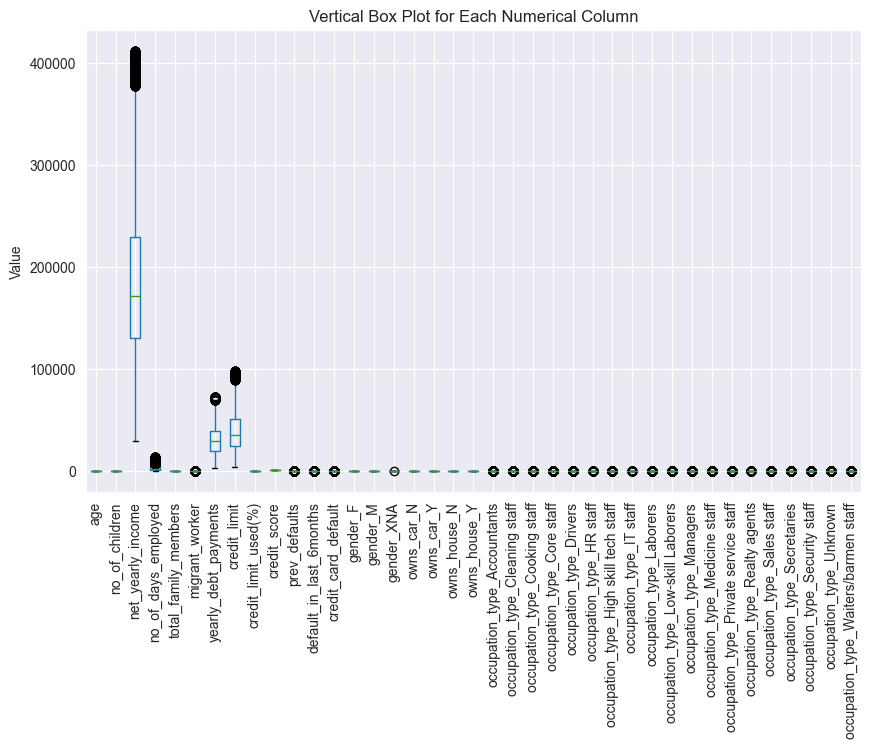

In [259]:

one_hot_encoded_data.boxplot(vert=True, figsize=(10, 6))
plt.title('Vertical Box Plot for Each Numerical Column')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

In [156]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your features and 'y' contains your target variable
# X should be your feature matrix (independent variables)
# y should be your target variable (dependent variable)

# Split the data into training (80%) and testing (20%) sets
y = one_hot_encoded_data['credit_card_default']
X = one_hot_encoded_data.drop(columns=['credit_card_default'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 'test_size' specifies the proportion of the test set (in this case, 20%)
# 'random_state' sets the random seed for reproducibility

# Check the shapes of the resulting sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)


Training set - Features: (22353, 38) Target: (22353,)
Testing set - Features: (9581, 38) Target: (9581,)


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'data' is your DataFrame and 'columns_to_normalize' contains the column names to be standardized
 # Replace with your column names

# Initialize StandardScaler


# Fit and transform the selected columns using StandardScaler

# Display the normalized DataFrame

def normalize(data):
    scaler = StandardScaler()
    columns_to_normalize = numeric_columns.columns
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
    return data

X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)



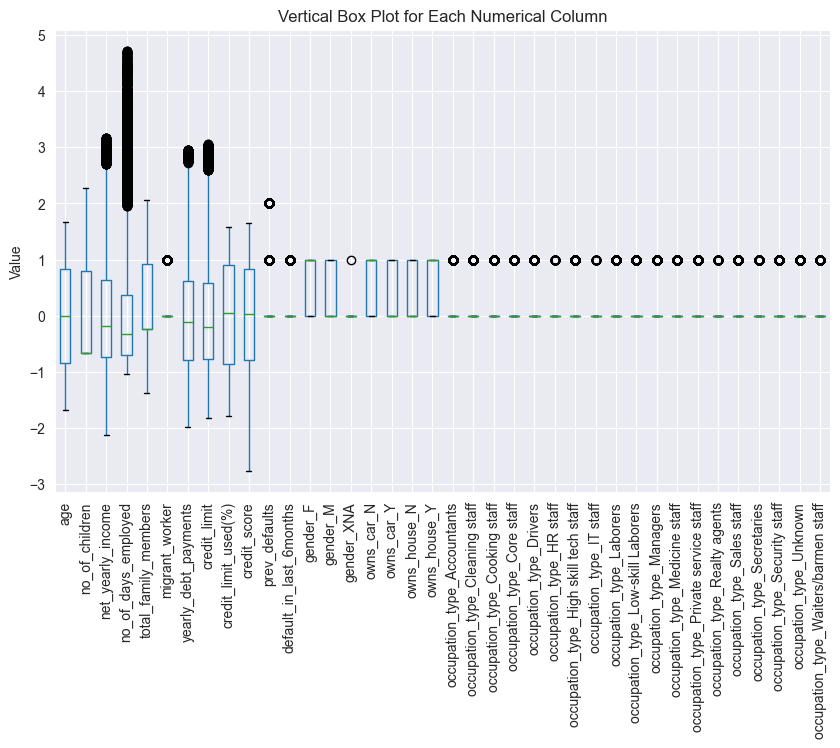

In [258]:
X_train_normalized.boxplot(vert=True, figsize=(10, 6))
plt.title('Vertical Box Plot for Each Numerical Column')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

In [158]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN


# Apply a combination of over-sampling and under-sampling using SMOTEENN

def smoteData(xtrain, ytrain):

    #smote_enn = SMOTEENN(random_state=42)
    # Apply ADASYN to generate synthetic samples
    adasyn = ADASYN(random_state=42)
    X_train_resampled, y_train_resampled = adasyn.fit_resample(xtrain, ytrain)
    return X_train_resampled, y_train_resampled


X_train_resampled, y_train_resampled = smoteData(X_train_normalized, y_train)



In [159]:
X_train_resampled.shape, y_train_resampled.shape

((40532, 38), (40532,))

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, auc, make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

imbalance_ratio =  len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# No
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced', {0: 1, 1: imbalance_ratio}],
    'max_iter': [100, 500]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train_normalized, y_train)

best_model = grid_search.best_estimator_
# Assuming 'X' and 'y' are your feature matrix and target variable

# Create an instance of Logistic Regression


# Use Stratified K-fold cross-validation


# Define a scorer for balanced accuracy

y_prob = best_model.predict_proba(X_test_normalized)[:, 1]
y_pred = best_model.predict(X_test_normalized)
y_pred_train = best_model.predict(X_train_normalized)

In [204]:
best_params_logistic = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_logistic)

best_model_logistic = grid_search.best_estimator_

Best Hyperparameters:
{'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100}



Top 10 Coefficients:
credit_score: -1.3960869630755577
credit_limit_used(%): 0.9046768802032723
prev_defaults: 0.5448629288986447
default_in_last_6months: 0.5079493504084632
no_of_days_employed: -0.1623606144145647
gender_M: 0.06889947412165698
gender_F: -0.0687614413529861
net_yearly_income: -0.0519969473059753
occupation_type_Laborers: 0.043261164357013535
owns_car_Y: -0.037626318153419644


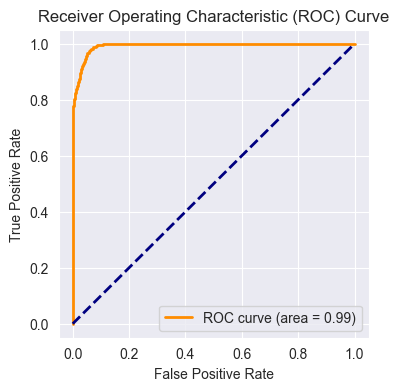

In [206]:



# Fit the model on the entire resampled training data for feature importance
best_model.fit(X_train_normalized, y_train)

# Extract and print the top 10 coefficients
coefs = best_model.coef_[0]
top_10_indices = np.argsort(np.abs(coefs))[::-1][:10]
top_10_features = X_train_normalized.columns[top_10_indices]
top_10_coefs = coefs[top_10_indices]

print("\nTop 10 Coefficients:")
for feature, coef in zip(top_10_features, top_10_coefs):
    print(f"{feature}: {coef}")

# Plot the ROC curve for the entire resampled training dataset
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Use the best model for prediction on the test set
 # You can replace this with the best model from hyperparameter tuning
y_pred_test = best_model.predict(X_test_normalized)
y_prob_test = best_model.predict_proba(X_test_normalized)[:, 1]


Train Set Accuracy: 0.9454211962600099

Test Set Accuracy: 0.9463521553073792

Test Set Balanced Accuracy: 0.9563962455646837

Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      8720
           1       0.63      0.97      0.76       861

    accuracy                           0.95      9581
   macro avg       0.81      0.96      0.87      9581
weighted avg       0.96      0.95      0.95      9581


Test Set Confusion Matrix:
 [[8233  487]
 [  27  834]]

Test Set ROC AUC Score: 0.9929744856098627
Overall F1 Score: 0.951280
Overall Precision: 0.963895
Overall Recall: 0.946352


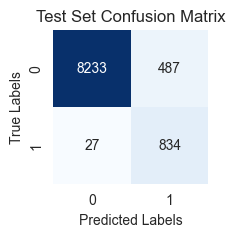

In [207]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Calculate and print various metrics for the test set
print("\nTrain Set Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_test))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))
print("\nTest Set Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nTest Set ROC AUC Score:", roc_auc_score(y_test, y_prob_test))
overall_f1_score = f1_score(y_test, y_pred, average='weighted')
print(f'Overall F1 Score: {overall_f1_score:.6f}')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Set Confusion Matrix')
plt.show()



In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, roc_auc_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' and 'y' are your feature matrix and target variable
# Assuming 'X_train_normalized', 'X_test_normalized', 'y_train', and 'y_test' are available

# Create a pipeline with PCA and Logistic Regression
pipeline = Pipeline([
    ('pca', PCA()),
    ('logreg', LogisticRegression())
])

# Define the parameter grid for grid search
param_grid = {
    'pca__n_components': range(1, len(X_train_normalized.columns) + 1),
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__class_weight': [None, 'balanced', {0: 1, 1: imbalance_ratio}],
    'logreg__max_iter': [100, 500]
}

# Define scoring metrics
scoring = {
    'AUC': 'roc_auc',
    'Balanced Accuracy': make_scorer(balanced_accuracy_score)
}

# Create a Stratified K-fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, cv=cv, refit='AUC')
grid_search.fit(X_train_normalized, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Use the best model for prediction on the test set
y_prob = best_model.predict_proba(X_test_normalized)[:, 1]
y_pred = best_model.predict(X_test_normalized)

In [197]:
best_params_logistic_PCA = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_logistic_PCA)

best_model_logistic_PCA = grid_search.best_estimator_



Best Hyperparameters:
{'logreg__C': 0.1, 'logreg__class_weight': None, 'logreg__max_iter': 500, 'pca__n_components': 8}


8
Top 8 eigenvalues: [2.00823599 1.88541735 1.23508802 1.0046527  0.99666448 0.82036103
 0.74969562 0.58691437]
Explained variance ratios of the principal components: [0.17415056 0.16349995 0.10710458 0.08712165 0.08642893 0.07114021
 0.06501224 0.05089614]


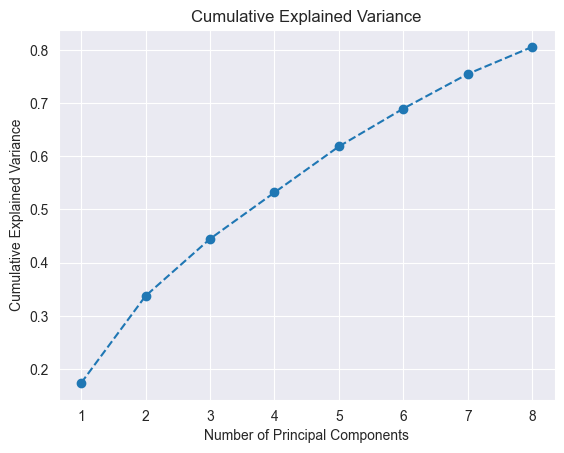

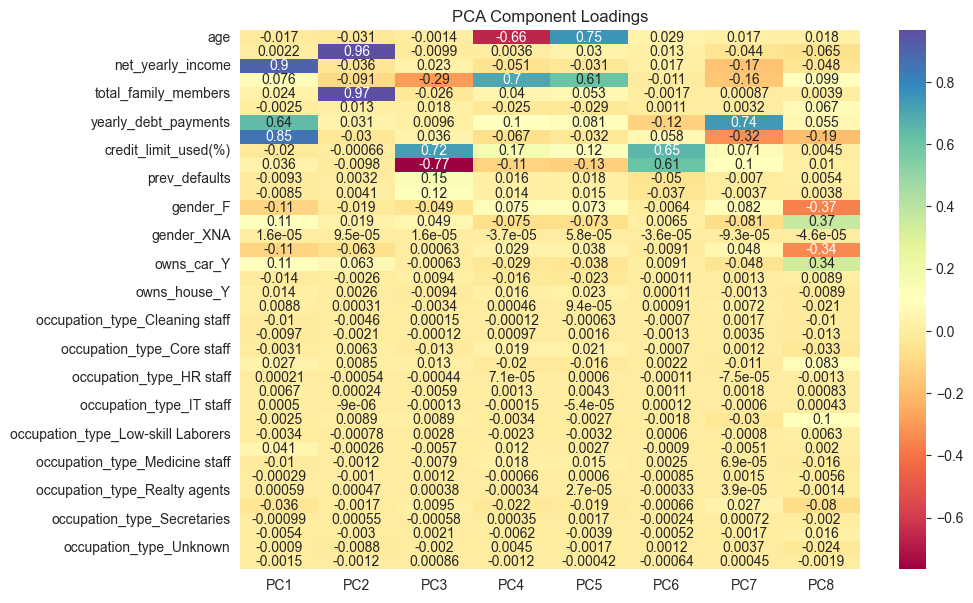

Most influential features for PC1: ['net_yearly_income', 'credit_limit', 'yearly_debt_payments']
Most influential features for PC2: ['total_family_members', 'no_of_children', 'no_of_days_employed']
Most influential features for PC3: ['credit_score', 'credit_limit_used(%)', 'no_of_days_employed']
Most influential features for PC4: ['no_of_days_employed', 'age', 'credit_limit_used(%)']
Most influential features for PC5: ['age', 'no_of_days_employed', 'credit_score']
Most influential features for PC6: ['credit_limit_used(%)', 'credit_score', 'yearly_debt_payments']
Most influential features for PC7: ['yearly_debt_payments', 'credit_limit', 'net_yearly_income']
Most influential features for PC8: ['gender_M', 'gender_F', 'owns_car_Y']


In [217]:
pca_8_components = PCA(n_components=8)
x_train_pca = pca_8_components.fit_transform(X_train_normalized)
print(len(x_train_pca[0]))
# Access eigenvalues and explained variance ratios
eigenvalues = pca_8_components.explained_variance_
explained_variance_ratio = pca_8_components.explained_variance_ratio_

print(f'Top 8 eigenvalues: {eigenvalues}')
print(f'Explained variance ratios of the principal components: {explained_variance_ratio}')

# Visualize explained variance ratios
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

pc_df = pd.DataFrame(data=x_train_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

# Get the loadings for the principal components
loadings = pca_8_components.components_.T * np.sqrt(pca_8_components.explained_variance_)

# Create a DataFrame for loadings
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=X_train.columns)

# Visualizing the loadings
plt.figure(figsize=(10, 7))
sns.heatmap(loading_matrix, annot=True, cmap='Spectral')
plt.title("PCA Component Loadings")
plt.show()

# Identifying most influential features for each principal component
for i in range(loading_matrix.shape[1]):
    pc = loading_matrix.iloc[:, i]
    most_influential = pc.abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"Most influential features for PC{i+1}: {most_influential}")


In [208]:
train_pred = best_model_logistic_PCA.predict(X_train_normalized)
print("\nTrain Set  Accuracy:", accuracy_score(y_train, train_pred))


Train Set  Accuracy: 0.9766474298751845


Best Number of Components: 8

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8720
           1       0.94      0.79      0.86       861

    accuracy                           0.98      9581
   macro avg       0.96      0.89      0.92      9581
weighted avg       0.98      0.98      0.98      9581


Test Set Confusion Matrix:
 [[8680   40]
 [ 179  682]]

Test Set AUC: 0.9931625536766507

Test Set Balanced Accuracy: 0.8937575253865252

Test Set  Accuracy: 0.9771422607243503
Overall F1 Score: 0.976229
Overall Precision: 0.976632
Overall Recall: 0.977142


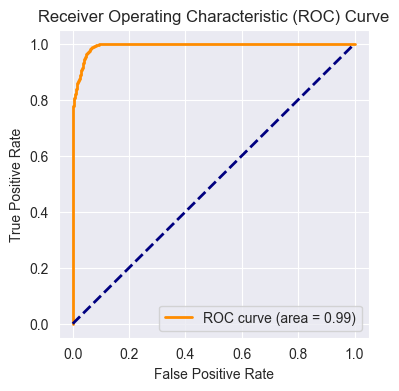

In [202]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Print the results
print("Best Number of Components:", best_model.named_steps['pca'].n_components)
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))
print("\nTest Set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Set AUC:", roc_auc_score(y_test, y_prob))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nTest Set  Accuracy:", accuracy_score(y_test, y_pred))
overall_f1_score = f1_score(y_test, y_pred, average='weighted')
print(f'Overall F1 Score: {overall_f1_score:.6f}')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [209]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the SVM pipeline without a scaler
svc = SVC()

# Set the parameters you want to search through
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create a pipeline without a scaler
model = Pipeline(steps=[('svc', svc)])

# Set up GridSearchCV
scorer = make_scorer(balanced_accuracy_score)
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=cv, n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

In [210]:
best_params_SVM = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_SVM)

best_model_SVM = grid_search.best_estimator_

Best Hyperparameters:
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


Accuracy of the SVM classifier on train set: 0.992006
Accuracy of the SVM classifier on test set: 0.968584
ROC AUC Score: 0.9916055312256923

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      8720
           1       0.80      0.87      0.83       861

    accuracy                           0.97      9581
   macro avg       0.89      0.92      0.91      9581
weighted avg       0.97      0.97      0.97      9581


Confusion Matrix:
 [[8534  186]
 [ 115  746]]

Test Set Balanced Accuracy: 0.9225520517000714

Test Set  Accuracy: 0.9685836551508193
Overall F1 Score: 0.969141
Overall Precision: 0.969964
Overall Recall: 0.968584


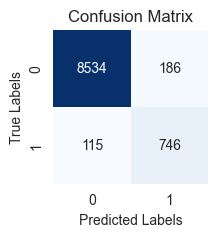

In [212]:

# Predict on the test data
y_pred = best_model.predict(X_test_normalized)
y_prob = best_model.decision_function(X_test_normalized)
y_pred_train = best_model.predict(X_train_resampled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'Accuracy of the SVM classifier on train set: {accuracy_train:.6f}')
print(f'Accuracy of the SVM classifier on test set: {accuracy:.6f}')
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nTest Set  Accuracy:", accuracy_score(y_test, y_pred))
overall_f1_score = f1_score(y_test, y_pred, average='weighted')
print(f'Overall F1 Score: {overall_f1_score:.6f}')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the best hyperparameters


Accuracy of the SVM classifier on test set: 0.954285

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      8720
           1       0.68      0.93      0.79       861

    accuracy                           0.95      9581
   macro avg       0.84      0.94      0.88      9581
weighted avg       0.96      0.95      0.96      9581


Confusion Matrix:
 [[8340  380]
 [  58  803]]

ROC AUC Score: 0.9916055312256923


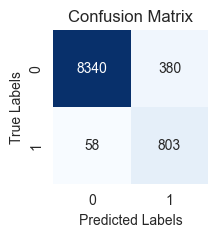

In [214]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svc_linear = SVC(kernel='linear', gamma='scale' , C=  10)

# It's often a good idea to scale your data for SVM
# Fit the SVM model
svc_linear.fit(X_train_resampled, y_train_resampled )
# Predict on the test data
y_pred = svc_linear.predict(X_test_normalized)
# You can now compare y_pred to y_test to evaluate the model performance
# For example, using accuracy_score:
from sklearn.metrics import accuracy_score


# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM classifier on test set: {accuracy:.6f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


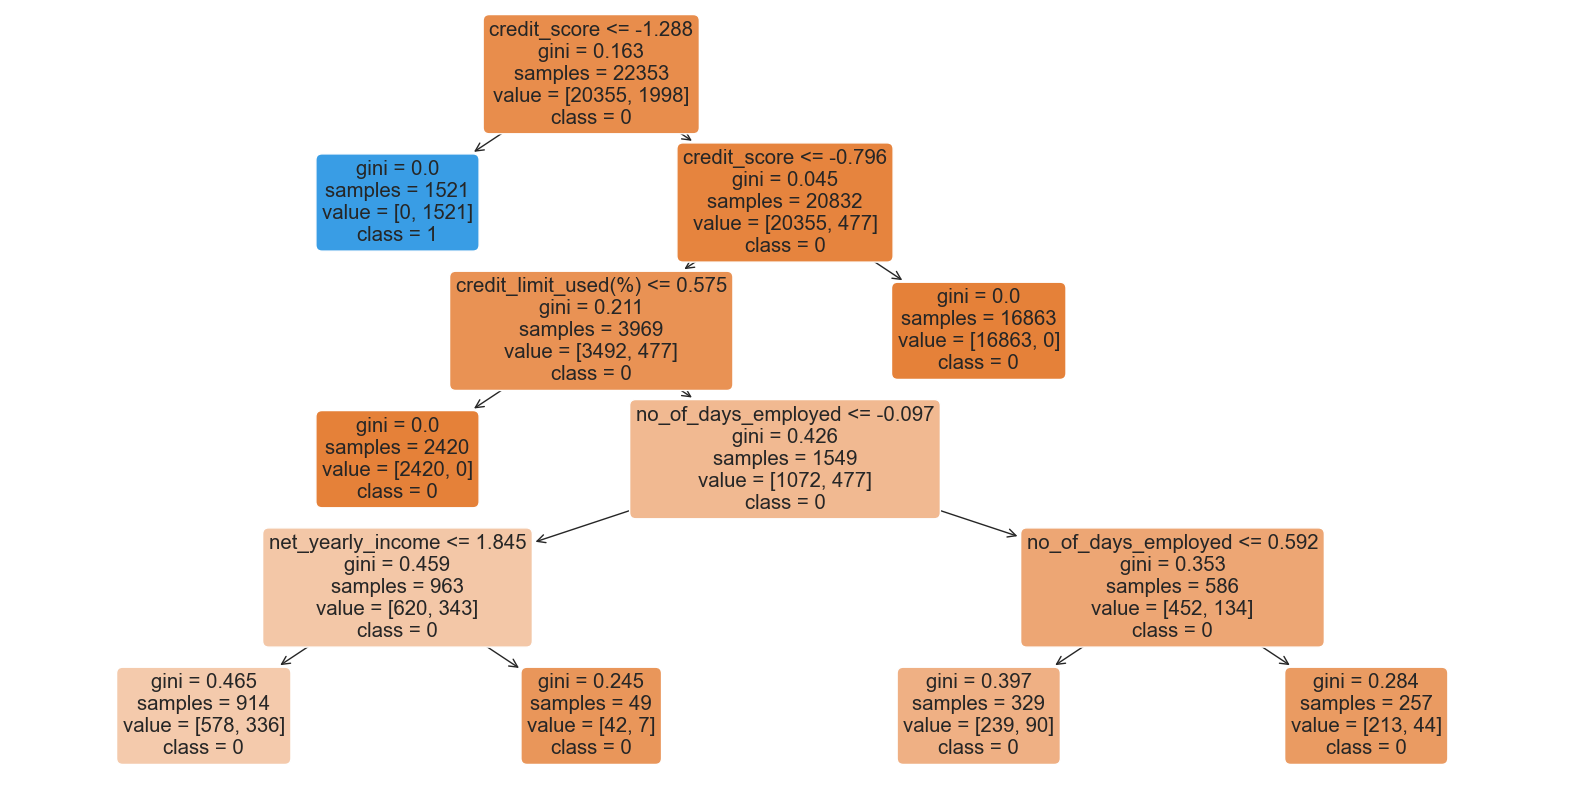

In [254]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Assuming 'X_train_pca' and 'y_train' are your training data and target variable

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train_normalized, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
plt.show()


In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, balanced_accuracy_score, f1_score,
    precision_score, recall_score
)
import seaborn as sns

# Assuming 'X_train_pca' and 'y_train' are your training data and target variable
# Assuming 'X_test_normalized' and 'y_test' are your testing data and target variable

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [219]:
best_params_RF = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_RF)

best_model_RF = grid_search.best_estimator_

Best Hyperparameters:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


                    Feature  Importance
9              credit_score    0.373684
10            prev_defaults    0.259048
11  default_in_last_6months    0.198503
8      credit_limit_used(%)    0.064804
3       no_of_days_employed    0.017983
7              credit_limit    0.015625
2         net_yearly_income    0.015621
6      yearly_debt_payments    0.015502
0                       age    0.011820
4      total_family_members    0.003725


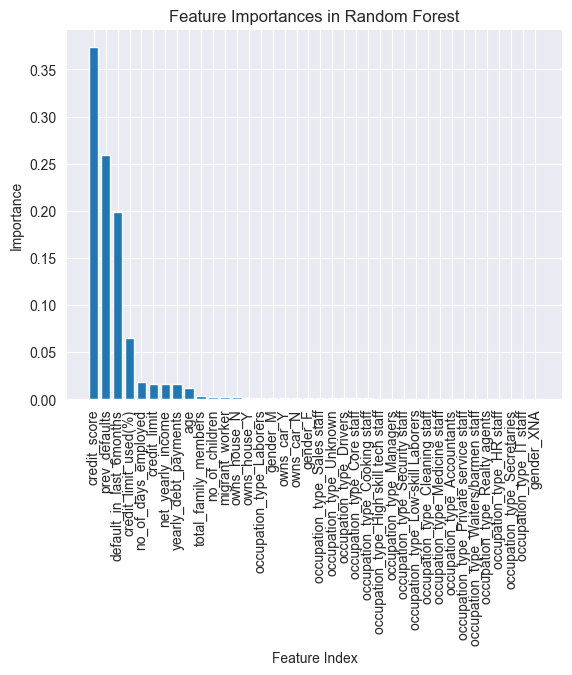

Accuracy of the classifier on train set: 0.990024
Accuracy of the classifier on test set: 0.977873

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8720
           1       1.00      0.75      0.86       861

    accuracy                           0.98      9581
   macro avg       0.99      0.88      0.92      9581
weighted avg       0.98      0.98      0.98      9581


Confusion Matrix:
 [[8719    1]
 [ 211  650]]

Test Set Balanced Accuracy: 0.8774107209453483

Test Set Accuracy: 0.9778728733952614
Overall F1 Score: 0.976468
Overall Precision: 0.978357
Overall Recall: 0.977873


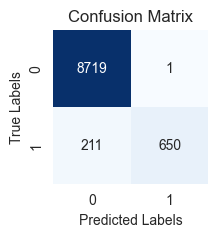

In [224]:

# Feature Importances (assuming X_train_resampled has column names)
feature_importances = best_model.feature_importances_
feature_val = X_train.columns

# Create a DataFrame to display the feature importances
importances_df = pd.DataFrame({'Feature': feature_val, 'Importance': feature_importances})
importances_df = importances_df.sort_values('Importance', ascending=False)

# Display the top features
print(importances_df.head(10))

# Plot the feature importances
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.xticks(rotation=90)
plt.show()

# Evaluate the model performance
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)


# If your RandomForestClassifier is able to provide probability estimates
# Uncomment the following line
# roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_normalized)[:, 1])

print(f'Accuracy of the classifier on train set: {accuracy_train:.6f}')
print(f'Accuracy of the classifier on test set: {accuracy:.6f}')

# Uncomment the following line if ROC AUC is applicable
# print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))

overall_f1_score = f1_score(y_test, y_pred, average='weighted')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall F1 Score: {overall_f1_score:.6f}')
print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/20
570/570 [==============================] - 2s 2ms/step - loss: 0.2482 - accuracy: 0.8935 - val_loss: 0.0908 - val_accuracy: 0.9852
Epoch 2/20
570/570 [==============================] - 1s 2ms/step - loss: 0.1157 - accuracy: 0.9602 - val_loss: 0.0798 - val_accuracy: 0.9798
Epoch 3/20
570/570 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9656 - val_loss: 0.0726 - val_accuracy: 0.9810
Epoch 4/20
570/570 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9693 - val_loss: 0.0864 - val_accuracy: 0.9768
Epoch 5/20
570/570 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9698 - val_loss: 0.0743 - val_accuracy: 0.9815
Epoch 6/20
570/570 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9730 - val_loss: 0.0629 - val_accuracy: 0.9857
Epoch 7/20
570/570 [==============================] - 1s 2ms/step - loss: 0.0745 - accuracy: 0.9728 - val_loss: 0.0704 - val_accuracy: 0.9859
Epoch 

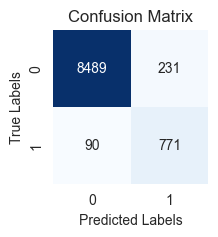

In [225]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report


# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
#model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1, validation_split=0.1,  callbacks=[early_stopping])


# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64, verbose=1, validation_split=0.1)

model_nn_sequential = model
# Predict on the testing data
predictions = model.predict(X_test_normalized)
predictions_train = model.predict(X_train_resampled)
y_pred_train = np.round(predictions_train).flatten()

y_pred = np.round(predictions).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)


# If your RandomForestClassifier is able to provide probability estimates
# Uncomment the following line
# roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_normalized)[:, 1])

print(f'Accuracy of the classifier on train set: {accuracy_train:.6f}')
print(f'Accuracy of the classifier on test set: {accuracy:.6f}')

# Uncomment the following line if ROC AUC is applicable
# print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))

overall_f1_score = f1_score(y_test, y_pred, average='weighted')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall F1 Score: {overall_f1_score:.6f}')
print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [263]:
from lime import lime_tabular
from sklearn.model_selection import train_test_split


# Train the classifier on the training data
best_model_RF.fit(X_train_resampled, y_train_resampled)

explainer = lime_tabular.LimeTabularExplainer(X_train_resampled.values, feature_names=X_train.columns, class_names=['Default', 'Not Default'], discretize_continuous=True, mode='classification')
instance = X_test_normalized.iloc[1]
explanation = explainer.explain_instance(instance, best_model_RF.predict_proba, num_features=len(X_train.columns))
explanation.show_in_notebook()

In [264]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(X_train_resampled.values, feature_names=X_train.columns, class_names=['Default', 'Not Default'], discretize_continuous=True, mode='classification')
instance = X_test_normalized.iloc[X_test_normalized.index.get_loc(11437)]
explanation = explainer.explain_instance(instance, best_model_RF.predict_proba, num_features=len(X_train.columns))
explanation.show_in_notebook()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy of the classifier on train set: 0.968001
Accuracy of the classifier on test set: 0.966496

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      8720
           1       0.66      0.94      0.78       861

    accuracy                           0.95      9581
   macro avg       0.83      0.95      0.87      9581
weighted avg       0.96      0.95      0.96      9581


Confusion Matrix:
 [[8307  413]
 [  53  808]]

Test Set Balanced Accuracy: 0.9455406424149431

Test Set Accuracy: 0.9513620707650559
Overall F1 Score: 0.955055
Overall Precision: 0.963833
Overall Recall: 0.951362


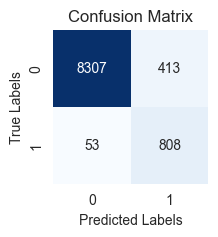

In [233]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, balanced_accuracy_score

# Define the parameter grid
param_grid = {
    'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1],
    'sgdclassifier__l1_ratio': [0, 0.15, 0.5, 0.85, 1],
    # Add other parameters here if necessary
}

# Create the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss='log_loss', penalty='elasticnet', max_iter=1000, tol=1e-3, random_state=42)
)

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='balanced_accuracy', cv=5, n_jobs=-1, verbose=2)

# Assuming 'X_train_resampled', 'y_train_resampled', 'X_test_normalized', and 'y_test' are defined

# Fit GridSearchCV to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test_normalized)
y_pred_train = best_model.predict(X_train_resampled)
# Generate and print a classification report
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)


# If your RandomForestClassifier is able to provide probability estimates
# Uncomment the following line
# roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_normalized)[:, 1])

print(f'Accuracy of the classifier on train set: {accuracy_train:.6f}')
print(f'Accuracy of the classifier on test set: {accuracy:.6f}')

# Uncomment the following line if ROC AUC is applicable
# print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))

overall_f1_score = f1_score(y_test, y_pred, average='weighted')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall F1 Score: {overall_f1_score:.6f}')
print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [228]:
best_model_SDG = grid_search.best_estimator_
print(grid_search.best_params_)


{'sgdclassifier__alpha': 0.001, 'sgdclassifier__l1_ratio': 0.15}


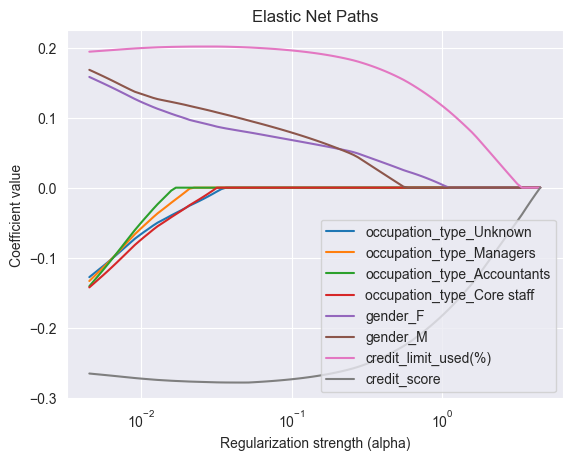

In [231]:
import matplotlib.pyplot as plt
from sklearn.linear_model import enet_path
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X and y are your dataset features and target

# Compute the Elastic Net path
alphas, coefs, _ = enet_path(X_train_resampled, y_train_resampled, l1_ratio=0.15)  # l1_ratio between 0 and 1
feature_names = X_train_resampled.columns
# Select the four largest coefficients by their maximum absolute value across all alphas
max_coefs = np.argsort(np.max(np.abs(coefs), axis=1))[-8:]



# Plotting the paths
plt.figure()
for coef in max_coefs:
    k = feature_names[coef]
    plt.plot(alphas, coefs[coef], label=f'{k}')

plt.xscale('log')  # Alphas are typically on a log scale
plt.xlabel('Regularization strength (alpha)')
plt.ylabel('Coefficient value')
plt.title('Elastic Net Paths')
plt.legend()
plt.axis('tight')  # Optional: fits the plot more neatly
plt.show()


In [ ]:
from lime import lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'model' is your trained classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
random_forest.fit(X_train_resampled, y_train_resampled)

explainer = lime_tabular.LimeTabularExplainer(X_train_resampled.values, feature_names=X_train.columns, class_names=['Default', 'Not Default'], discretize_continuous=True, mode='classification')
instance = X_test_normalized.iloc[X_test_normalized.index.get_loc(11437)]
explanation = explainer.explain_instance(instance, random_forest.predict_proba, num_features=len(X_train.columns))




In [234]:
values = [val for val in max_coefs]
features = X_train_resampled.columns
np.random.seed(42)

# Generate random indices
random_indices = np.random.choice(X_train_resampled.index, size=30000, replace=False)

# Extract the samples
new_sample_X = X_train_resampled.loc[random_indices]
new_sample_y = y_train_resampled.loc[random_indices]

# Display the new samples
new_sample_X, new_sample_y

new_sample_X = new_sample_X[features]



In [235]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'features' is a NumPy array with customer features
# Calculate the cosine similarity
# matrix for the features
cosine_sim = cosine_similarity(new_sample_X)

# Define a threshold for connecting nodes
threshold = 0.8  # This is an example value; adjust it based on your needs

# Initialize the adjacency matrix with zeros
n = new_sample_X.shape[0]
A = np.zeros((n, n))

# Fill in the adjacency matrix based on the threshold
for i in range(n):
    for j in range(n):
        # Create an edge if the cosine similarity exceeds the threshold
        # and we're not looking at the similarity of a node with itself
        if i != j and cosine_sim[i, j] > threshold:
            A[i, j] = 1


In [236]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Convert the feature matrix and adjacency matrix to PyTorch tensors
X_tensor = torch.tensor(new_sample_X.values, dtype=torch.float)
A_tensor = torch.tensor(A, dtype=torch.float)

# Create an edge index from the adjacency matrix
edge_index = A_tensor.nonzero(as_tuple=False).t()

# Create a graph data object
data = Data(x=X_tensor, edge_index=edge_index)

# Define a simple GNN model
class SimpleGNN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(SimpleGNN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)
        self.conv2 = GCNConv(16, 16)
        self.fc = torch.nn.Linear(16, num_classes)


    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)  # Optional: Apply non-linearity before the dense layer
        # Dense layer
        x = self.fc(x)

        return F.log_softmax(x, dim=1)

# Initialize the model
model = SimpleGNN(num_node_features=data.num_node_features, num_classes=2)

# Define a loss function and optimizer
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Get the target variable as a tensor
y_tensor = torch.tensor(new_sample_y.values, dtype=torch.long)

# Create a train_mask
train_mask = torch.zeros(y_tensor.size(0), dtype=torch.bool)
train_mask[:int(len(train_mask) * 0.8)] = True

# Add train_mask to data object
data.train_mask = train_mask

# Training loop
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = loss_func(out[data.train_mask], y_tensor[data.train_mask])
    loss.backward()
    optimizer.step()


In [237]:
# To test the model for prediction and calculate accuracy, you'll need to use the test set.
# Assuming you have already split your dataset into training and test sets and created a test_mask similar to train_mask:

# Create a test_mask (assuming the last 20% of the data is for testing)
test_mask = torch.zeros(y_tensor.size(0), dtype=torch.bool)
test_mask[int(len(test_mask) * 0.8):] = True
data.test_mask = test_mask

# Function to test the model and calculate accuracy
def test_model(model, data, mask):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        out = model(data.x, data.edge_index)
        preds = out.argmax(dim=1)  # Get the predictions
        correct = preds[mask] == y_tensor[mask]  # Check against the ground truth
        accuracy = int(correct.sum()) / int(mask.sum())  # Calculate accuracy
    return accuracy

# Test the model
accuracy = test_model(model, data, data.test_mask)
print(f"Validation Accuracy: {accuracy:.4f}")



Validation Accuracy: 0.9733


In [238]:
values = [val for val in max_coefs]
features = X_test_normalized.columns
np.random.seed(42)

# Generate random indices


test_sample_X = X_test_normalized
test_sample_Y = y_test


In [239]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'features' is a NumPy array with customer features
# Calculate the cosine similarity matrix for the features
cosine_sim = cosine_similarity(test_sample_X)

# Define a threshold for connecting nodes
threshold = 0.8  # This is an example value; adjust it based on your needs

# Initialize the adjacency matrix with zeros
n = test_sample_X.shape[0]
A = np.zeros((n, n))

# Fill in the adjacency matrix based on the threshold
for i in range(n):
    for j in range(n):
        # Create an edge if the cosine similarity exceeds the threshold
        # and we're not looking at the similarity of a node with itself
        if i != j and cosine_sim[i, j] > threshold:
            A[i, j] = 1


Accuracy: 0.9729
Precision: 0.9724
Recall: 0.9729


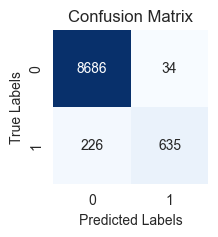

In [247]:

def test_model(model, data, y_tensor):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        out = model(data.x, data.edge_index)
        preds = out.argmax(dim=1)  # Get the predictions
        correct = (preds == y_tensor).sum().item()  # Count correct predictions
        accuracy = correct / len(y_tensor)  # Calculate accuracy
        precision = precision_score(y_tensor, preds, average='weighted')
        recall = recall_score(y_tensor, preds, average='weighted')
        balanced_acc = balanced_accuracy_score(y_tensor, preds)
        #weighted_f1 = f1_score(y_tensor, preds, average='weighted')
        conf_matrix = confusion_matrix(y_tensor, preds)

    return accuracy, precision, recall, balanced_acc, conf_matrix
# Test the model
X_tensor = torch.tensor(test_sample_X.values, dtype=torch.float)
A_tensor = torch.tensor(A, dtype=torch.float)
edge_index = A_tensor.nonzero(as_tuple=False).t()
data = Data(x=X_tensor, edge_index=edge_index)
y_tensor = torch.tensor(test_sample_Y.values, dtype=torch.long)

# Assuming 'model' is your trained Graph Neural Network model
accuracy, precision, recall, balanced_acc, conf_matrix1 = test_model(model, data, y_tensor)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
#print(f'f1_score: {f1_score:.4f}')
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Ensemble Accuracy: 0.9493
Accuracy of the Ensemble classifier on train set: 0.975624
Accuracy of the  Ensemble classifier on test set: 0.949275

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      8720
           1       0.65      0.97      0.77       861

    accuracy                           0.95      9581
   macro avg       0.82      0.96      0.87      9581
weighted avg       0.96      0.95      0.95      9581


Confusion Matrix:
 [[8264  456]
 [  30  831]]

Test Set Balanced Accuracy: 0.9564316082217179

Test Set Accuracy: 0.9492746059910239
Overall Precision: 0.964868
Overall Recall: 0.949275


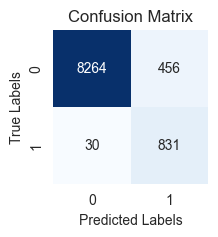

In [250]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[
    ('lg', best_model_logistic),
    ('rf', best_model_RF),
    ('svc', best_model_SVM),
    ('pca', best_model_logistic_PCA),
    ('sdg', best_model_SDG)

], voting='hard')
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = voting_classifier.predict(X_test)
y_pred_train = voting_classifier.predict(X_train_resampled)
# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Accuracy: {accuracy:.4f}')

accuracy_train = accuracy_score(y_train_resampled, y_pred_train)


# If your RandomForestClassifier is able to provide probability estimates
# Uncomment the following line
# roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_normalized)[:, 1])

print(f'Accuracy of the Ensemble classifier on train set: {accuracy_train:.6f}')
print(f'Accuracy of the  Ensemble classifier on test set: {accuracy:.6f}')

# Uncomment the following line if ROC AUC is applicable
# print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))

overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

